# **When Topology Meets Data**

_AMAT 255 - Mathematical Data Science Final Report_

In [ ]:
__author__ = 'Cristian B. Jetomo'

__Topological Data Analysis (TDA)__ :
- is an emerging field of research that harnesses techniques from computational topology to analyze data.
- makes use of topological concepts (e.g., simplicial complexes and homology) to extract shape or topological features from data, usually via Persistent Homology.
- is favored by researchers due to its scalability to high-dimensional datasets and its stability against input perturbations and noise (Hensel, Moor, & Rieck, 2021; Misha & Motta, 2023).
- has been used in numerous applications including but not limited to rhythm detection (Ness-Cohn & Braun, 2021), biomedicine (Skaf & Laubenbacher, 2022), financial market analysis (Basu & Li, 2019), aviation (Ryerson & Balakrishnan, 2019), and sign language recognition (Jetomo & De Lara, 2025).

Due to its gaining popularity and applicability, this notebook will be focused on the implementation of Persistent Homology (PH), a well studied technique from TDA, to various areas of studies. Here, we give some insights on why and when TDA is favored to use, some of its sample applications, as well as a hands-on implementation of TDA in Python by means of solving imagined exercises and real world problems.

 ### *Installing and Importing Dependencies*

In [ ]:
!pip install persim giotto-tda

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 109.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.8/558.8 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.6/460.6 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.5 MB/s eta 0:00:00
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18104 sha256=b92231bdbea7de81a885196c82721203e8cc5c133cc80912b0efde09d643ea1d
  Stored in directory: /root/.cache/pip/wheels/1f/cc/2d/de23a8b9ae586817b0b44de4a4b

In [ ]:
!pip install --force-reinstall --no-cache-dir ripser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 142.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 128.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.3/841.3 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 161.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 229.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 160.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 227.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 186.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 155.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 166.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 197.2 MB/s eta 0:00:

In [ ]:
from ripser import ripser
from persim import plot_diagrams
from gtda.homology import VietorisRipsPersistence

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['scatter.edgecolors'] = 'black'

import warnings
warnings.filterwarnings("ignore")

from ipywidgets import interact, fixed, widgets
from sklearn.preprocessing import StandardScaler

#### Helper Functions

In [ ]:
from matplotlib.patches import Polygon

def restructure_dgm_to_ripser(giotto_dgm:np.ndarray):
    """ Restructure Giotto-TDA diagram output to ripser dgm format """
    maxdim = np.unique(giotto_dgm[:,:,2].astype(int)).max()
    ripser_dgm = []
    for i in range(maxdim+1):
        ripser_dgm.append(giotto_dgm[giotto_dgm[:,:,2] == i][:,:2])

    return ripser_dgm

def compute_PD(dataset:np.ndarray, homology_dim:list, epsilon:float):
    VR = VietorisRipsPersistence(homology_dimensions=homology_dim,
                                 max_edge_length=epsilon, n_jobs=-1)
    dgm = VR.fit_transform(dataset.reshape(1, -1, 2))
    return restructure_dgm_to_ripser(dgm)

def plot_VRfiltration_withcircle(dataset:np.ndarray, epsilon:float, homology_dim:list, xy_range:list=None):

    fig = plt.figure(figsize=(15,6))

    # plot samples
    ax = fig.add_subplot(131)
    ax.scatter(dataset[:,0], dataset[:,1], c='k')

    ax.set_aspect('equal')
    ax.set_title(f'$\epsilon$ = {epsilon}')

    # epsilon ball
    for i, center in enumerate(dataset):
        circle = plt.Circle(center, epsilon, edgecolor='black', fill=True, alpha=0.5, fc='green')
        ax.add_artist(circle)

    # extra samples without the circles
    ax1 = fig.add_subplot(132)
    ax1.scatter(dataset[:,0], dataset[:,1], c='k')
    ax1.set_aspect('equal')
    ax1.set_title(f'$\epsilon$ = {epsilon}')

    # add lines for intersecting circles
    for i in range(len(dataset)):
        for j in range(i+1, len(dataset)):
            dist = np.linalg.norm(dataset[i] - dataset[j])
            if dist < 2 * epsilon:
                ax.plot([dataset[i,0], dataset[j,0]], [dataset[i,1], dataset[j,1]], 'k-')
                ax1.plot([dataset[i,0], dataset[j,0]], [dataset[i,1], dataset[j,1]], 'k-')

                # check for triangles
                for k in range(j+1, len(dataset)):
                  dist_ik = np.linalg.norm(dataset[i] - dataset[k])
                  dist_jk = np.linalg.norm(dataset[j] - dataset[k])

                  if dist_ik < 2 * epsilon and dist_jk < 2 * epsilon:
                      triangle = Polygon([[dataset[i,0], dataset[i,1]], [dataset[j,0], dataset[j,1]], [dataset[k,0], dataset[k,1]]],
                                         closed=True, facecolor='yellow', edgecolor='k', alpha=0.5)

                      triangle2 = Polygon([[dataset[i,0], dataset[i,1]], [dataset[j,0], dataset[j,1]], [dataset[k,0], dataset[k,1]]],
                                         closed=True, facecolor='yellow', edgecolor='k', alpha=0.5)
                      ax.add_patch(triangle)
                      ax1.add_patch(triangle2)

    # plot persistence diagram
    dgm = compute_PD(dataset, homology_dim, epsilon)
    ax2 = fig.add_subplot(133)
    ax2.set_title('Persistence Diagram')
    ax2.set_aspect('equal')
    d = 0.1
    if xy_range is None:
        xy_range = [-d, 1+d, -d, 1+d]
    plot_diagrams(dgm, ax=ax2, xy_range=xy_range)

    plt.show()

def plot_VRfiltration_withoutcircle(dataset:np.ndarray, epsilon:float, homology_dim:list, xy_range:list=None):

    fig = plt.figure(figsize=(12,6))

    # extra samples without the circles
    ax1 = fig.add_subplot(121)
    ax1.scatter(dataset[:,0], dataset[:,1], c='k')
    ax1.set_aspect('equal')
    ax1.set_title(f'$\epsilon$ = {epsilon}')

    # add lines for intersecting circles
    for i in range(len(dataset)):
        for j in range(i+1, len(dataset)):
            dist = np.linalg.norm(dataset[i] - dataset[j])
            if dist < 2 * epsilon:
                ax1.plot([dataset[i,0], dataset[j,0]], [dataset[i,1], dataset[j,1]], 'k-')

                # check for triangles
                for k in range(j+1, len(dataset)):
                  dist_ik = np.linalg.norm(dataset[i] - dataset[k])
                  dist_jk = np.linalg.norm(dataset[j] - dataset[k])

                  if dist_ik < 2 * epsilon and dist_jk < 2 * epsilon:
                      triangle = Polygon([[dataset[i,0], dataset[i,1]], [dataset[j,0], dataset[j,1]], [dataset[k,0], dataset[k,1]]],
                                         closed=True, facecolor='yellow', edgecolor='k', alpha=0.5)
                      ax1.add_patch(triangle)

    # plot persistence diagram
    dgm = compute_PD(dataset, homology_dim, epsilon)
    ax2 = fig.add_subplot(122)
    ax2.set_title('Persistence Diagram')
    ax2.set_aspect('equal')

    d = 0.1
    if xy_range is None:
        xy_range = [-d, 1+d, -d, 1+d]
    plot_diagrams(dgm, ax=ax2, xy_range=xy_range)

    plt.show()

def plot_VRfiltration(dataset:np.ndarray, epsilon:float, homology_dim:list, xy_range:list=None):

    fig = plt.figure(figsize=(6,6))
    # plot persistence diagram
    dgm = compute_PD(dataset, homology_dim, epsilon)
    ax2 = fig.add_subplot(111)
    ax2.set_title(f'Persistence Diagram \n $\epsilon$ = {epsilon}')
    ax2.set_aspect('equal')

    d = 0.1
    if xy_range is None:
        xy_range = [-d, 1+d, -d, 1+d]
    plot_diagrams(dgm, ax=ax2, xy_range=xy_range)

    plt.show()

## **What does TDA contribute?**


1. Ability to capture global and multiscale structures.
2. Robustness to noise.
3. Provides geometric insights to data.
4. Versatility across domains.
5. Rich mathematical foundation (algebraic topology and homology theory) - ensuring results are interpretable and theoretically sound.

## **Intuitive Notion of Persistent Homology**

**Persistent homology (PH)** is a method in TDA that captures how the shape of data changes as you *“zoom in and out”* — helping you detect important structures like clusters, loops, and voids across different scales.

The method captures these shapes as topological features and tracks their appearance (birth) and disappearance (death).

Longer-lasting features are likely meaningful, while short-lived ones are often considered as noise.

**Simplicial Complexes:**

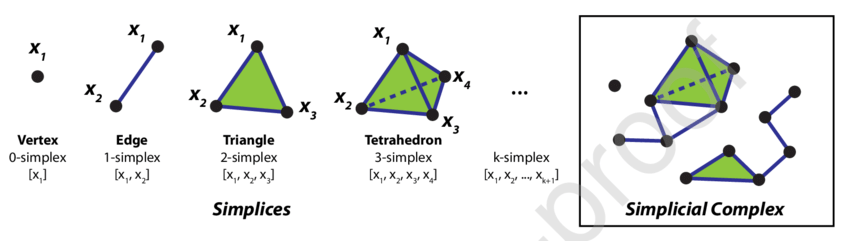

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

sample_dataset, _ = make_blobs(n_samples=75, centers=3, random_state=42)
sample_dataset = StandardScaler().fit_transform(sample_dataset)

interact(plot_VRfiltration_withcircle, dataset=fixed(sample_dataset),
          epsilon=widgets.FloatSlider(min=0, max=0.5, step=0.01, value=0.0),
          homology_dim=fixed([0]), xy_range=fixed(None));

interactive(children=(FloatSlider(value=0.0, description='epsilon', max=0.5, step=0.01), Output()), _dom_class…

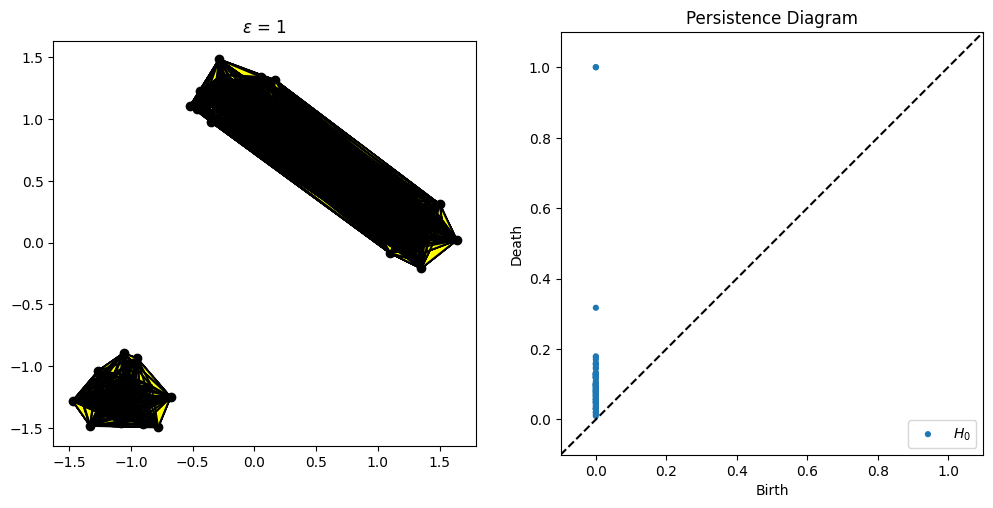

In [ ]:
plot_VRfiltration_withoutcircle(dataset=sample_dataset, epsilon=1, homology_dim=[0], xy_range=None)

1. **Ability to capture global and multiscale structures**

In [ ]:
interact(plot_VRfiltration_withoutcircle, dataset=fixed(sample_dataset),
          epsilon=widgets.FloatSlider(min=0, max=0.5, step=0.01, value=0.5),
          homology_dim=fixed([0,1]), xy_range=fixed(None));

interactive(children=(FloatSlider(value=0.5, description='epsilon', max=0.5, step=0.01), Output()), _dom_class…

2. **Robustness to noise**

In [ ]:
sample_dataset2 = sample_dataset + np.random.uniform(-0.25, 0.25, size=sample_dataset.shape)
sample_dataset2 = StandardScaler().fit_transform(sample_dataset2)

interact(plot_VRfiltration_withoutcircle, dataset=fixed(sample_dataset2),
          epsilon=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5),
          homology_dim=fixed([0,1]), xy_range=fixed(None));

interactive(children=(FloatSlider(value=0.5, description='epsilon', max=1.0, step=0.01), Output()), _dom_class…

3. **Provides geometric insights to data**

In [ ]:
# preparing circle dataset
def make_circle(n_samples, radius:float=1, noise:float=0, random_seed:int=42):
    """
    Function to create a circle in 2D space
    :param: n_samples:   number of datapoints of sample
    :param: radius:      desired radius of circle
    :param: noise:       magnitude of noise sampled from uniform distribution
    :param: random_seed: set seed for "randomness"
    :return: circle of dimension (n_samples, 2)
    """
    np.random.seed(random_seed)
    theta = np.linspace(0, 2*np.pi, n_samples)
    X = radius * np.cos(theta) + (noise * np.random.uniform(0,1,n_samples))
    Y = radius * np.sin(theta) + (noise * np.random.uniform(0,1,n_samples))
    return np.transpose([X,Y])

circle_data = None

@interact(n_samples=[20, 50, 100, 150, 200], radius=fixed(1),
         noise=widgets.FloatSlider(0, min=0, max=1), random_seed=fixed(42))
def plot_circle(n_samples, radius, noise, random_seed):
    global circle_data

    circle_data = make_circle(n_samples=n_samples, radius=radius, noise=noise, random_seed=random_seed)
    circle_data = StandardScaler().fit_transform(circle_data)

    plt.figure(figsize=(5,5))
    plt.scatter(circle_data[:,0], circle_data[:,1])
    sns.despine()
    plt.show()

interactive(children=(Dropdown(description='n_samples', options=(20, 50, 100, 150, 200), value=20), FloatSlide…

In [ ]:
interact(plot_VRfiltration, dataset=fixed(circle_data),
          epsilon=widgets.FloatSlider(min=0, max=2, step=0.10, value=0),
          homology_dim=fixed([0,1]), xy_range=fixed(None));  # try eps = 1

interactive(children=(FloatSlider(value=0.0, description='epsilon', max=2.0), Output()), _dom_classes=('widget…

4. **Versatility across domains**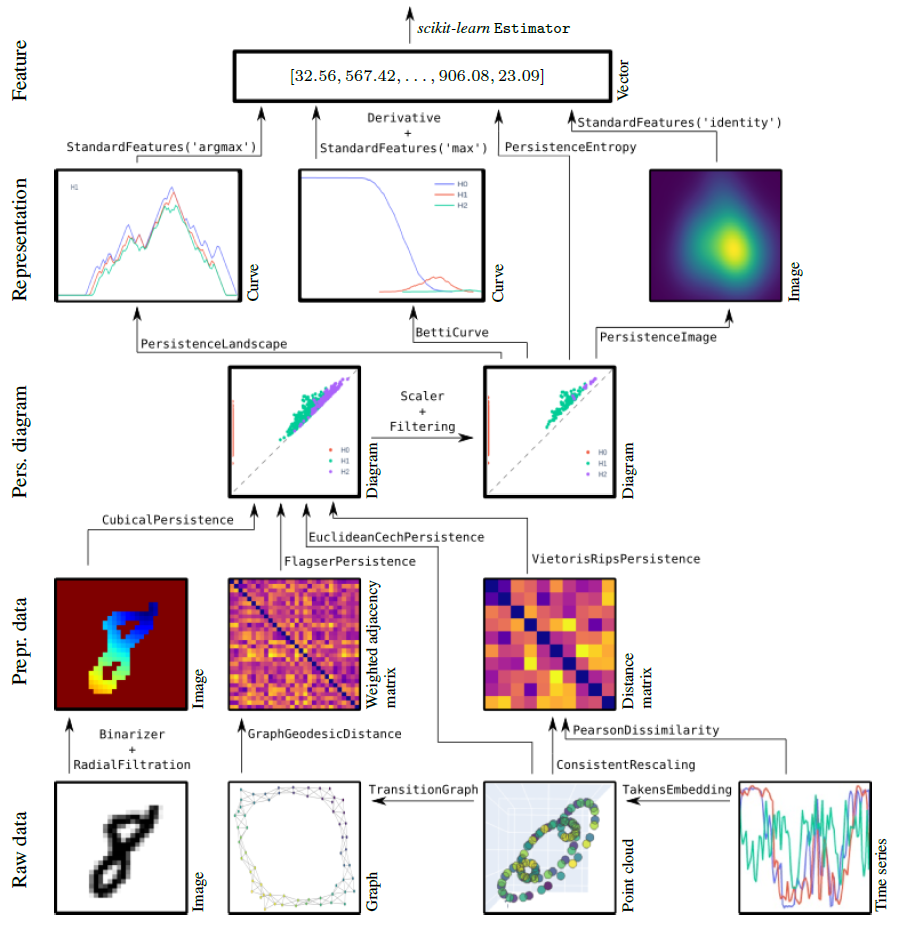

5. **Rich mathematical foundation**

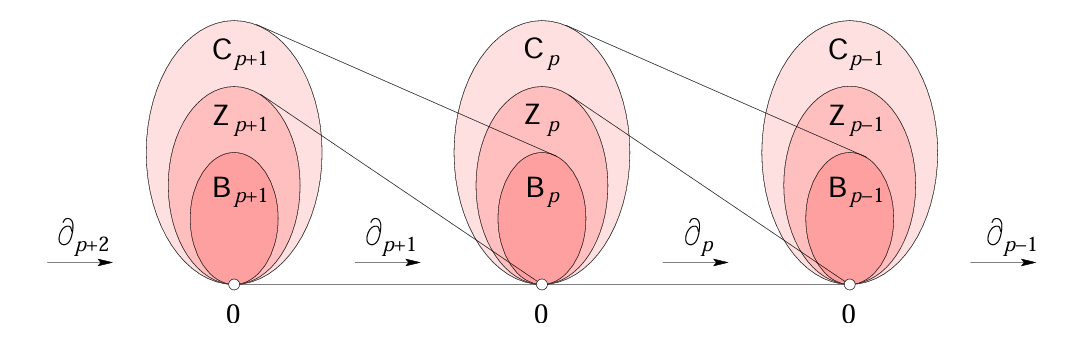

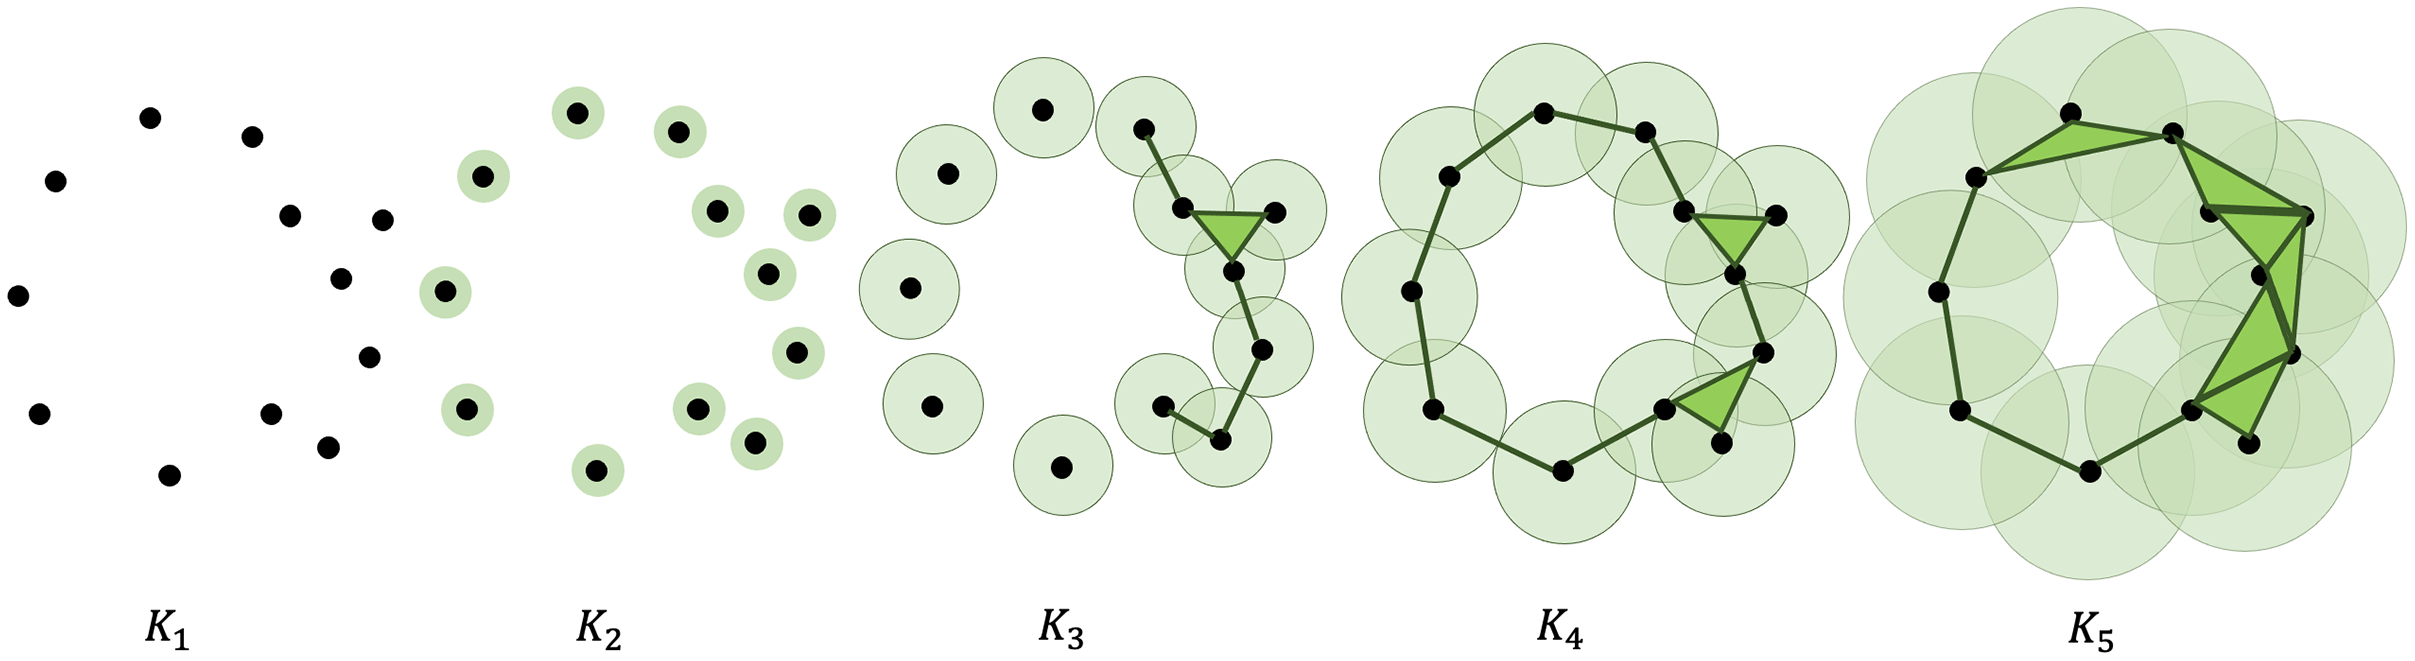

At its core, the theoretical foundation of PH is a product of algebraic topology. Here, the method is built on the idea of using algebraic tools to study the shape (topology) of data with its key concept relying on **homology**.

In this field, homology assigns algebraic objects (like vector spaces or groups) to topological spaces, in order to count and classify features: 0-dim (connected components), 1-dim (loops), 2-dim (voids), and so on.
Each type of this feature corresponds to a homology group: $H_0$, $H_1$, $H_2$, and so on, resp.

Now instead of a single shape, we have a sequence of shapes built from a dataset — usually through a filtration. PH studies **how the homology groups change** through this filtration.

Each scale level has a **simplicial complex**, and homology groups are computed at each level. PH studies the inclusion maps between these complexes and how homology classes persist through them. This forms a **persistence module** which is a sequence of vector spaces and linear maps from which we extract **barcodes** or **persistence diagrams**.

## **Persistent Homology Applications**

1. **high-dimensional data**
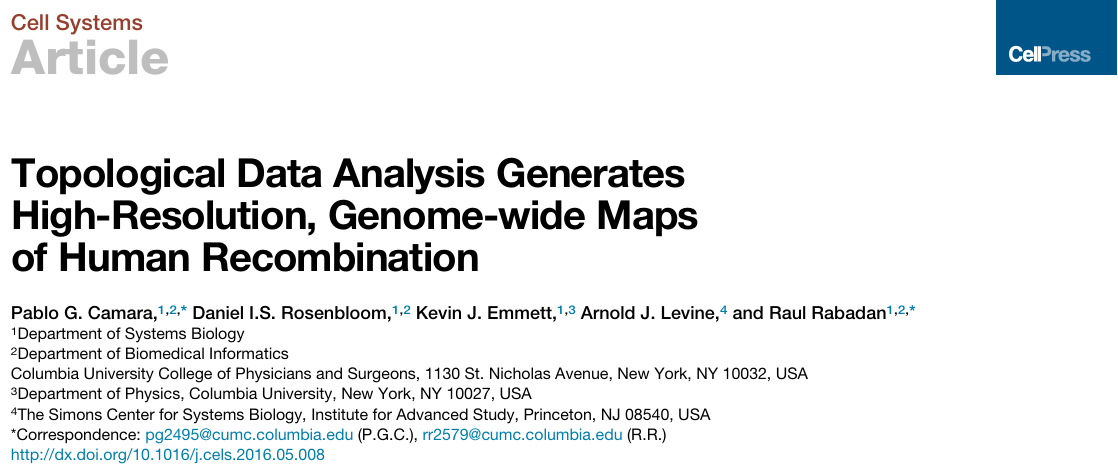

2. **time series**

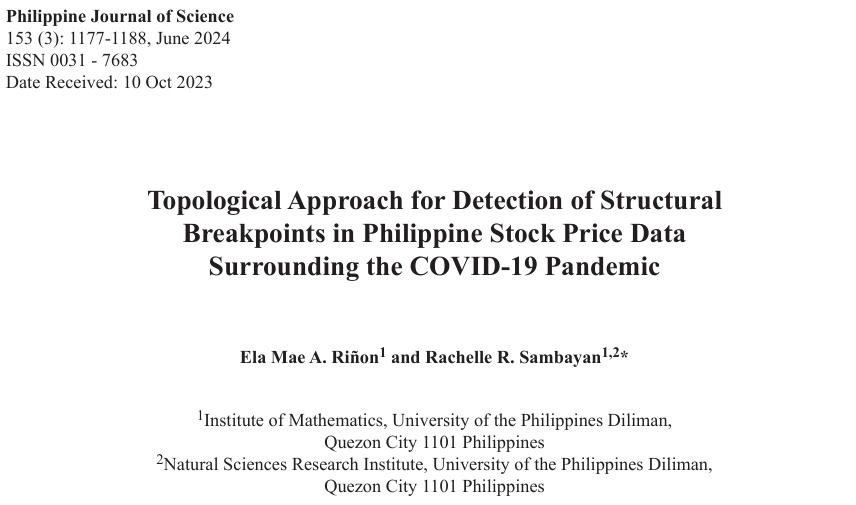

3. **graph networks**

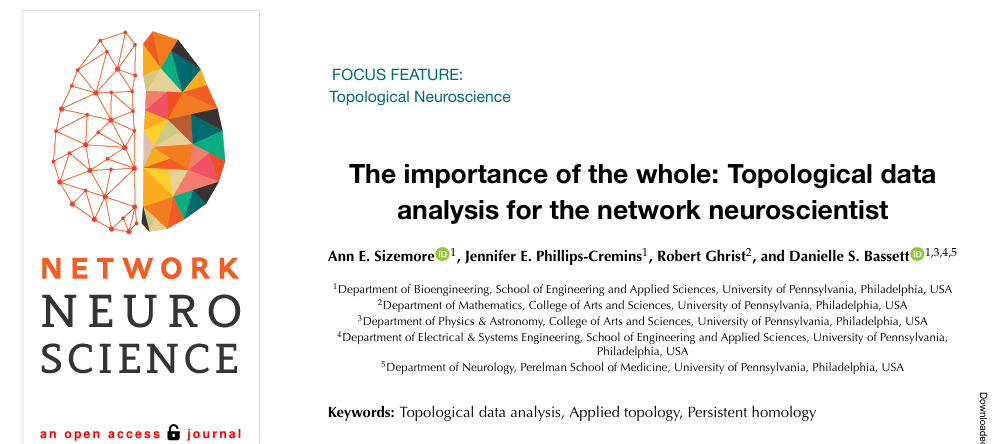

4. **image processing and computer vision**

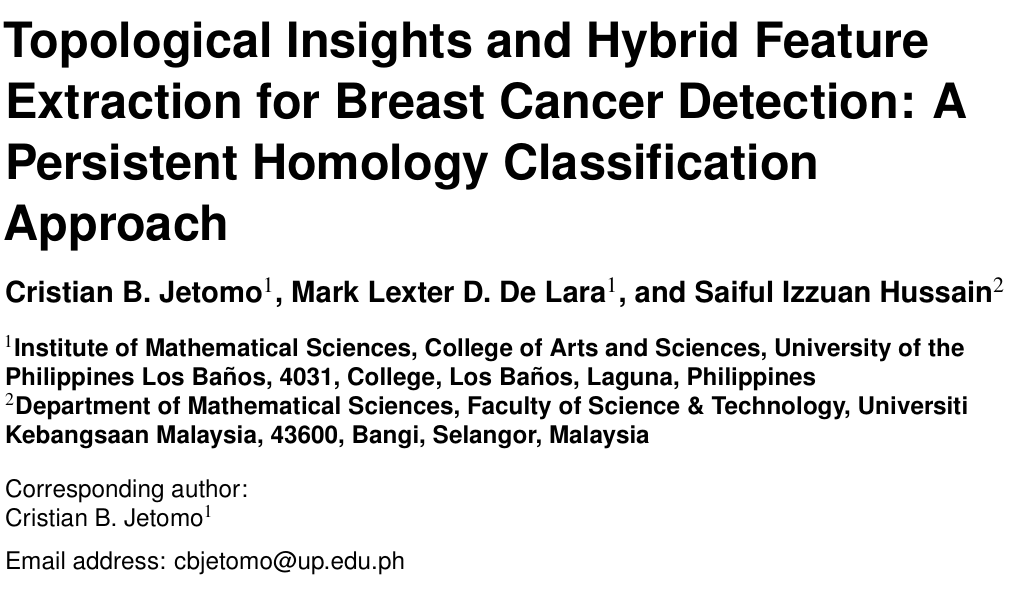

5. **machine learning**
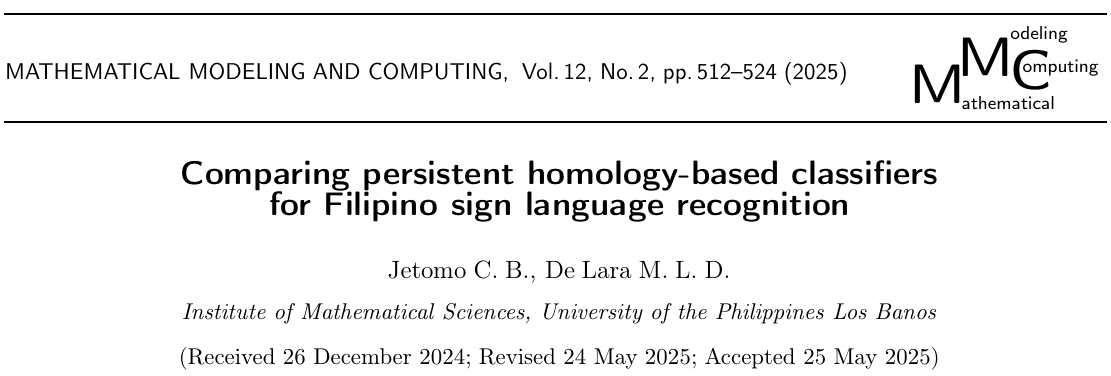

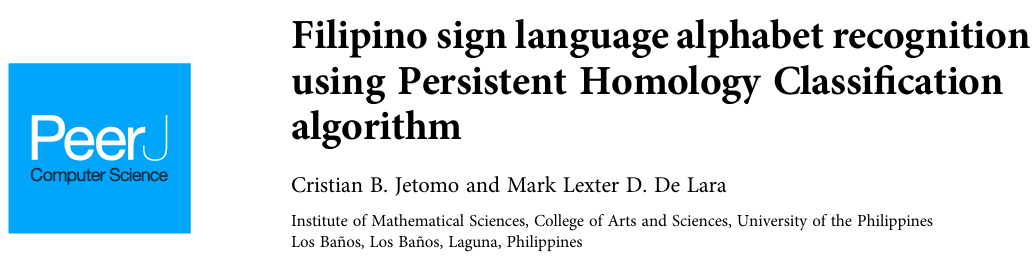

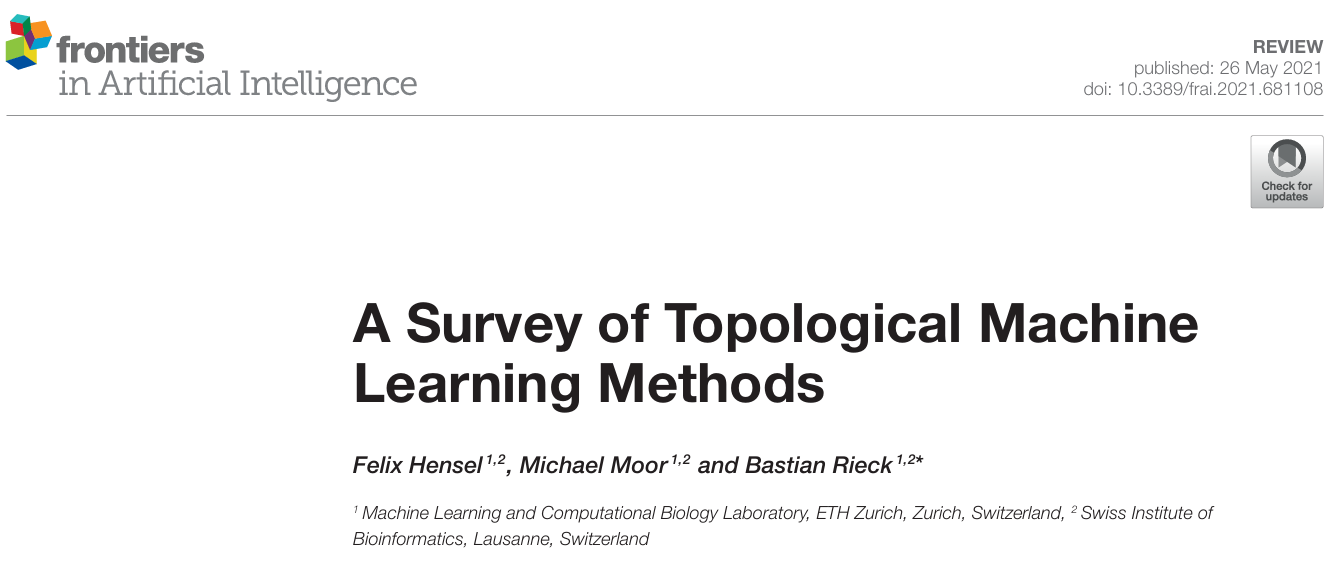

## **Hands-on TDA**

### Synthetic Datasets

#### Creating the Dataset

In [ ]:
# preparing circle dataset
circle_data = None

@interact(n_samples=[20, 50, 100, 150, 200], radius=fixed(1),
         noise=widgets.FloatSlider(0, min=0, max=1), random_seed=fixed(42))
def plot_circle(n_samples, radius, noise, random_seed):
    global circle_data

    circle_data = make_circle(n_samples=n_samples, radius=radius, noise=noise, random_seed=random_seed)
    circle_data = StandardScaler().fit_transform(circle_data)

    plt.figure(figsize=(5,5))
    plt.scatter(circle_data[:,0], circle_data[:,1])
    sns.despine()
    plt.show()

interactive(children=(Dropdown(description='n_samples', options=(20, 50, 100, 150, 200), value=20), FloatSlide…

In [ ]:
def make_sphere(radius:float=1, noise:float=0, random_seed:int=42):
    np.random.seed(random_seed)
    rho = radius
    theta, phi = np.mgrid[0:2*np.pi:20j, 0:np.pi:20j]
    x = rho * np.sin(phi) * np.cos(theta) + (noise * np.random.normal(0,1,size=(20,20)))
    y = rho * np.sin(phi) * np.sin(theta) + (noise * np.random.normal(0,1,size=(20,20)))
    z = rho * np.cos(phi) + (noise * np.random.normal(0,1,size=(20,20)))
    return np.array([x.flatten(), y.flatten(), z.flatten()]).transpose()

sphere_data = None

@interact(radius=fixed(1), noise=widgets.FloatSlider(0, min=0, max=0.5, step=0.01), random_seed=fixed(42))
def plot_sphere(radius, noise, random_seed):
  np.random.seed(random_seed)

  global sphere_data
  sphere_data = make_sphere(radius=radius, noise=noise, random_seed=random_seed)

  ax = plt.subplot(projection='3d')
  ax.scatter(sphere_data[:,0], sphere_data[:,1], sphere_data[:,2], alpha=0.5, c='r')
  sns.despine()
  plt.show()

interactive(children=(FloatSlider(value=0.0, description='noise', max=0.5, step=0.01), Output()), _dom_classes…

In [ ]:
def make_torus(n_samples_sqrt, c, a, noise=0):
    U, V = np.linspace(0, 2*np.pi, n_samples_sqrt), np.linspace(0, 2*np.pi, n_samples_sqrt)
    U, V = np.meshgrid(U, V)
    X = (c+a * np.cos(V))*np.cos(U) + (noise * np.random.normal(0,1, size=(n_samples_sqrt, n_samples_sqrt)))
    Y = (c+a * np.cos(V))*np.sin(U) + (noise * np.random.normal(0,1, size=(n_samples_sqrt, n_samples_sqrt)))
    Z = a*np.sin(V) + (noise * np.random.normal(0,1, size=(n_samples_sqrt, n_samples_sqrt)))
    return np.array([X.flatten(), Y.flatten(), Z.flatten()]).transpose()

torus_data = None

@interact(n_samples_sqrt=[10, 20, 30, 40, 50], c=fixed(6), a=fixed(2), noise=widgets.FloatSlider(0, min=0, max=0.5, step=0.05))
def plot_torus(n_samples_sqrt, c, a, noise):
    global torus_data
    torus_data = make_torus(n_samples_sqrt=n_samples_sqrt, c=c, a=a, noise=noise)

    ax = plt.subplot(projection='3d')
    ax.scatter(torus_data[:,0], torus_data[:,1], torus_data[:,2], alpha=0.5, c='g')
    sns.despine()
    plt.show()

interactive(children=(Dropdown(description='n_samples_sqrt', options=(10, 20, 30, 40, 50), value=10), FloatSli…

#### Computing for Persistent Homology

In [ ]:
# compute persistence homology using VR complex
VR_max1 = VietorisRipsPersistence(homology_dimensions=[0,1], n_jobs=-1)
VR_max2 = VietorisRipsPersistence(homology_dimensions=[0,1,2], n_jobs=-1)
circle_dgm = VR_max1.fit_transform(circle_data.reshape(1, -1, 2))
sphere_dgm = VR_max2.fit_transform(sphere_data.reshape(1, -1, 3))
torus_dgm = VR_max2.fit_transform(torus_data.reshape(1, -1, 3))

In [ ]:
circle_dgm_rips = restructure_dgm_to_ripser(circle_dgm)
sphere_dgm_rips = restructure_dgm_to_ripser(sphere_dgm)
torus_dgm_rips = restructure_dgm_to_ripser(torus_dgm)

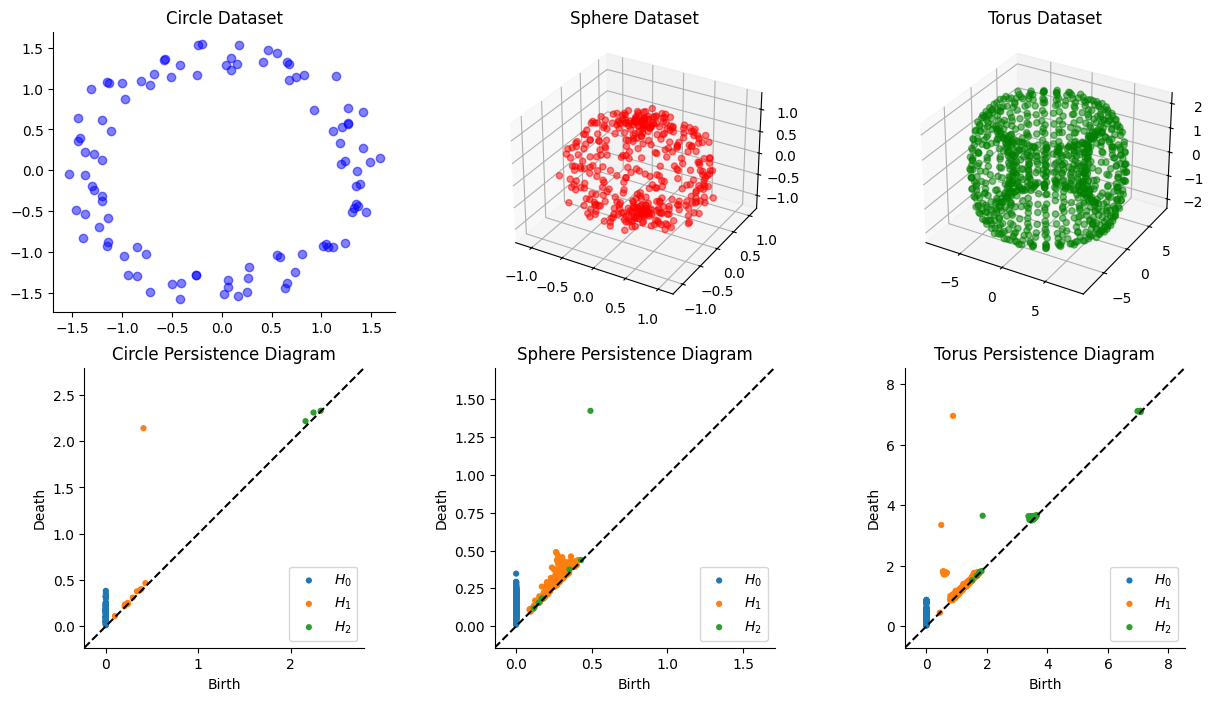

In [ ]:
# plotting persistence diagram of each synthetic dataset
fig = plt.figure(figsize=(15, 8))

ax1, ax4, ax5, ax6 = fig.add_subplot(231), fig.add_subplot(234), fig.add_subplot(235), fig.add_subplot(236)
ax2, ax3 = fig.add_subplot(232, projection='3d'), fig.add_subplot(233, projection='3d')

ax1.scatter(circle_data[:,0], circle_data[:,1], c='b', alpha=0.5)
ax2.scatter(sphere_data[:,0], sphere_data[:,1], sphere_data[:,2], c='r', alpha=0.5)
ax3.scatter(torus_data[:,0], torus_data[:,1], torus_data[:,2], c='g', alpha=0.5)

plot_diagrams(circle_dgm_rips, ax=ax4, show=False)
plot_diagrams(sphere_dgm_rips, ax=ax5, show=False)
plot_diagrams(torus_dgm_rips, ax=ax6, show=False)

ax1.set_title('Circle Dataset')
ax2.set_title('Sphere Dataset')
ax3.set_title('Torus Dataset')
ax4.set_title('Circle Persistence Diagram')
ax5.set_title('Sphere Persistence Diagram')
ax6.set_title('Torus Persistence Diagram')

sns.despine()
plt.show()

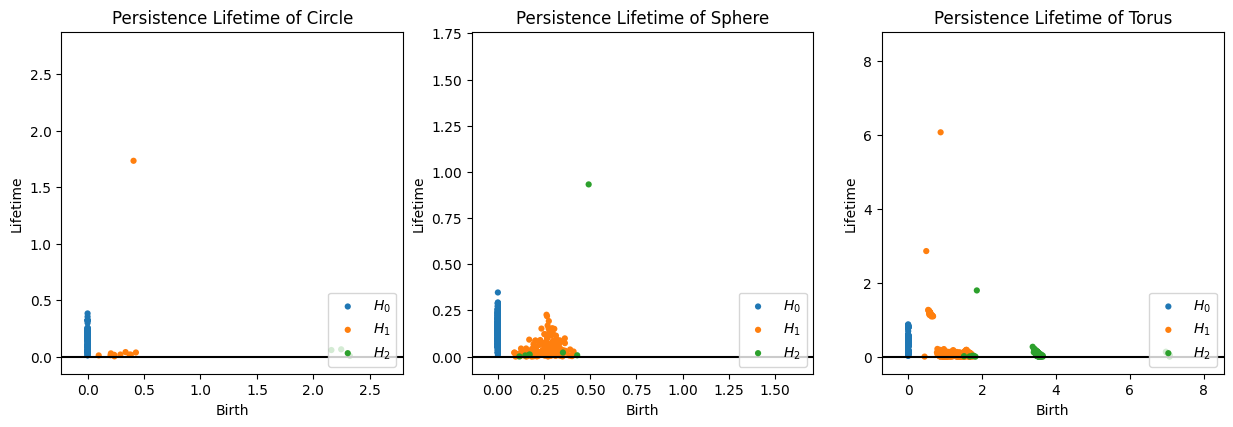

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

for i, dgm in enumerate([circle_dgm_rips, sphere_dgm_rips, torus_dgm_rips]):
    plot_diagrams(dgm, ax=axs[i], lifetime=True)
    axs[i].set_title(f'Persistence Lifetime of {["Circle", "Sphere", "Torus"][i]}')

plt.show()

### MNIST Handwritten Digits

It is mentioned earlier that implementing TDA is not only restricted to datasets in the form of point clouds. We can also do so on images, we just have to perform some initial steps to convert them into point clouds.

In the example below, we will try to use the MNIST handwritten digits from `sklearn`. The dataset characteristics are as follows:
1. Classes - 10 (0 to 9)
2. Samples per class - ~180
3. Samples total - 1797
4. Dimensionality - 64 (each image is 8x8)

In [ ]:
# importing the mnist dataset
from sklearn.datasets import load_digits

X, y = load_digits(n_class=10, return_X_y=True)
X.shape, y.shape

((1797, 64), (1797,))

Let's try to view first some sample image from each class.

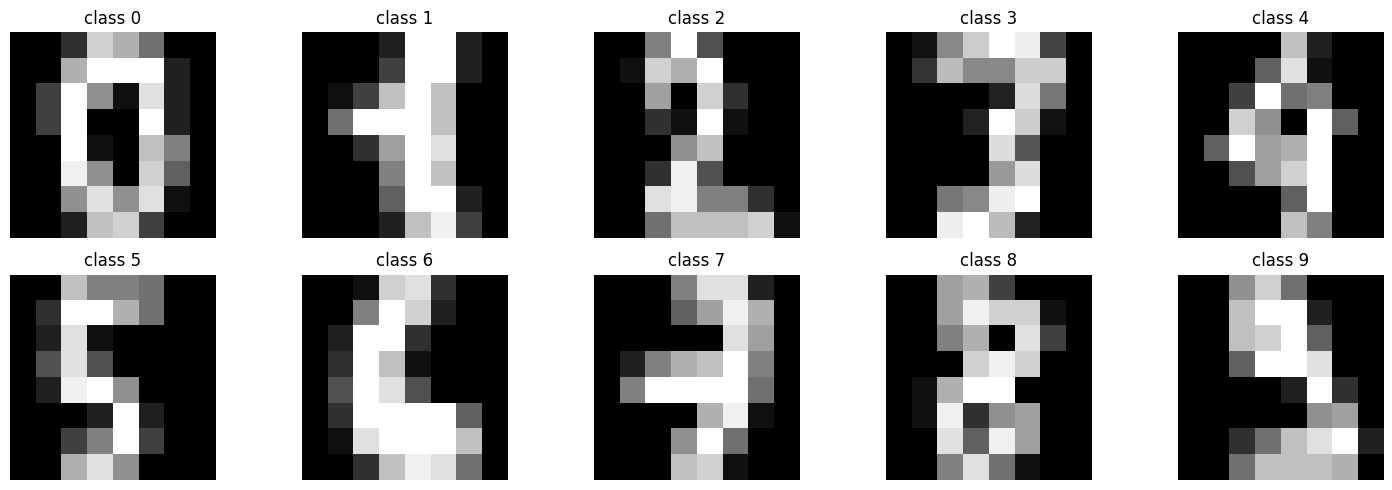

In [ ]:
# indices sample images
indices = [np.where(y == i)[0][2] for i in range(10)]
images = [X[i].reshape(8,8) for i in indices]
# plotting sample images
fig, axs = plt.subplots(2,5, figsize=(15,5))
axs = axs.flatten()

for i, idx in enumerate(indices):
  image = images[i]
  axs[i].imshow(image, cmap='gray')
  axs[i].axis('off')
  axs[i].set_title(f'class {i}')

plt.tight_layout()
plt.show()

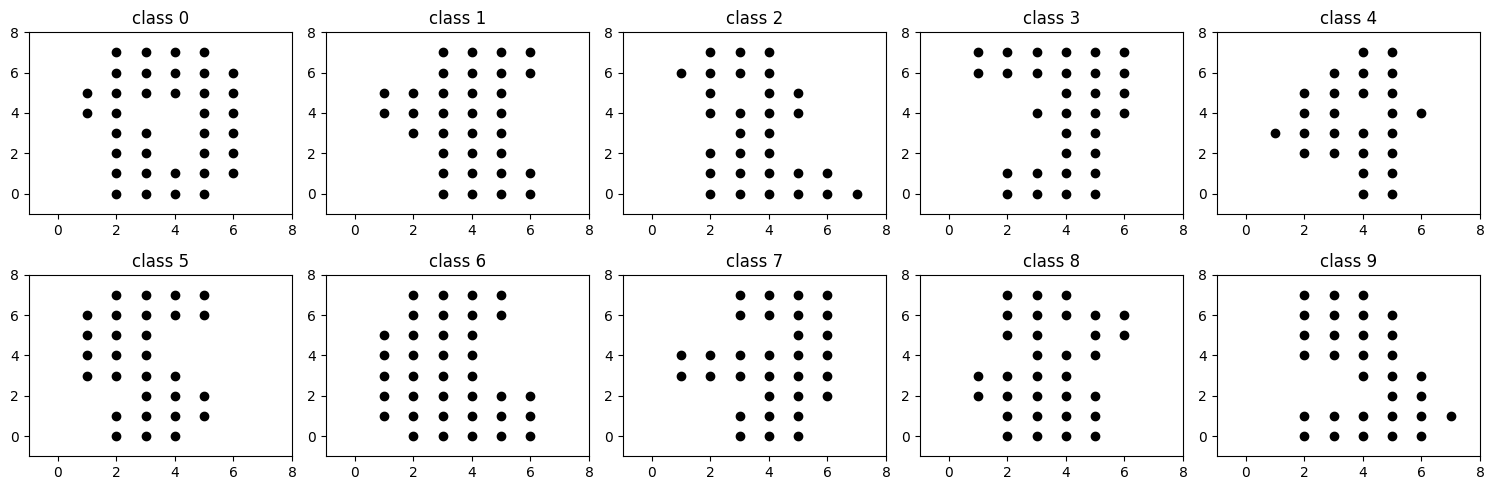

In [ ]:
from gtda.images import ImageToPointCloud

# convert images to point clouds
image_to_point_cloud = ImageToPointCloud(n_jobs=-1)
point_clouds = image_to_point_cloud.fit_transform(np.array(images))

# plot point clouds
fig, axs = plt.subplots(2,5, figsize=(15,5))
axs = axs.flatten()
for i, points in enumerate(point_clouds):
  x, y = points[:,0], points[:,1]
  axs[i].scatter(x, y, color='k')
  axs[i].set_xlim([-1, 8])
  axs[i].set_ylim([-1, 8])
  axs[i].set_title(f'class {i}')

plt.tight_layout()
plt.show()

Now that the images are converted into point clouds, we can then compute for their Persistent Homology.

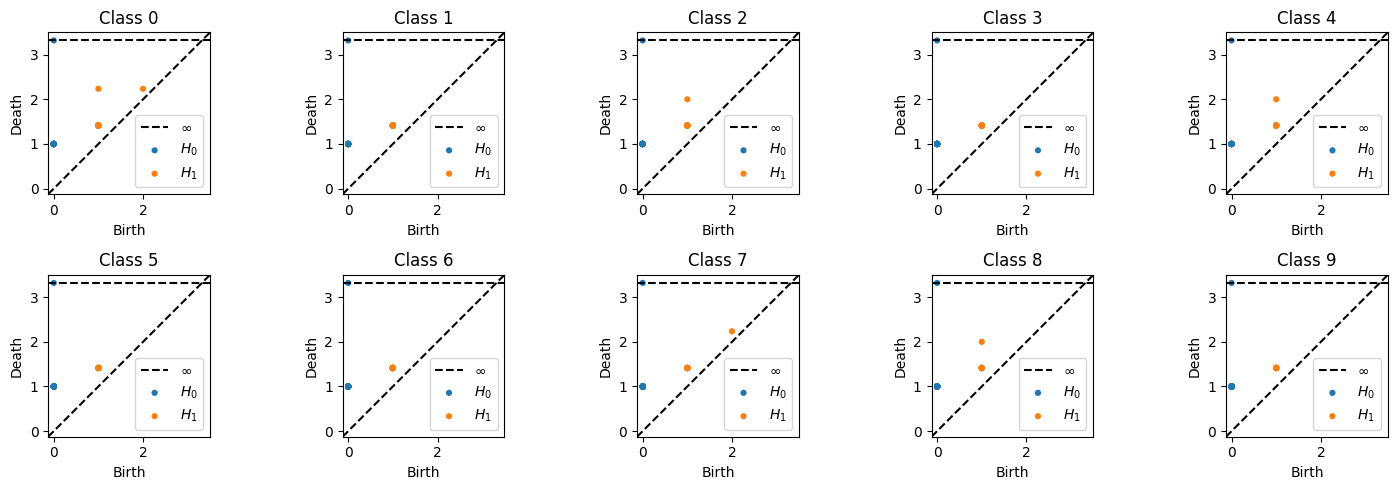

In [ ]:
diagrams = [ripser(point_clouds[i], maxdim=1)['dgms'] for i in range(len(point_clouds))]

# plot persistence diagrams
fig, axs = plt.subplots(2,5, figsize=(15,5))
axs = axs.flatten()
xmin, xmax, ymin, ymax = -0.125, 3.5, -0.125, 3.5
for i, dgm in enumerate(diagrams):
  plot_diagrams(dgm, ax=axs[i], xy_range=[xmin, xmax, ymin, ymax], title= f'Class {i}')

plt.tight_layout()
plt.show()

Analyzing the persistence diagrams above, we don't see much difference in some classes even though we should observe some changes. For example, the diagram for classes 2 and 8 are quite identical. This is in contrary to what expected since class 8 data should have two 1-dim holes $H_1$. However, note also that the sample image for class 8 looks almost identical to that of class 2 which makes our results reasonable. Perhaps a different and more clear dataset could give us better results.

## **Conclusions**

In this discussion, we have explored Topological Data Analysis (TDA) particularly under the lens of Persistent Homology (PH). We highlighted how it contributes to the existing data analysis tools, adding means and approaches to look into data. We've also explored numerous areas of applications of TDA and its potential for future studies as a newly emerging field of research. Finally, we've explored some simple applications of PH and how it can be adapted to different use cases.

Definitely, there are a lot more to explore in TDA. The Mapper Algorithm is another method in the field which, in contrast to PH, explores dimensionality reduction. This can then be extended to unsupervised learning applications. We also have Morse Theory in which the main focus is to simplify topology, and thus the information from data.

*In conclusion, TDA does not constitute a revolutionary field that will completely change how we do data science. Rather, TDA is yet another tool that gives us additional perspectives and insights from our dataset which would otherwise be inaccessible to our existing tools.*